# Sentiment Analysis of Tweets Related To Russia-Ukraine Conflicts

When a user wishes to voice his view on a trending topic on social media, we apply sentiment analysis to try to determine the sentiment score of that given opinion. Twitter is the most popular microblogging social media site, with over a billion users. Nearly 145 million people use the site on a daily basis. In today's world, the user tweets utilizing Hashtags, emojis, acronyms, and puns make it difficult to examine the data. Create sentiment scores by tweeting.


For this project, we collected Tweets using Twitter API including '#russiaukrainewar' from the Twitter website. Sentiment scores are given for all the tweets also we assigned values for each tweet, which represents how much percentage of tweets is positive, neutral, or negative.


Let’s get ready for the sentimental analysis journey,

# Importing Various Libraries

In [1]:
!pip install vaderSentiment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


**VADER stands for Valence Aware Dictionary and sEntiment Reasoner. Vader
performs well for the analysis of sentiments expressed in social media. These
sentiments must be present in the form of comments, tweets, retweets, or post
descriptions, and it works well on texts from other domains also.VADER is a lexicon
and rule-based analysis tool**

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Import The Dataset

In [3]:
df=pd.read_csv("30K Tweets with russiaukrainewar hashtag.csv")
df.sample(5)

Author_name  #Followers  Author FollowIndiadiadiag  \
19093     TokioAshiya       12412                      12049   
8540     ClausHoumann        4435                        938   
18520      krnsisdead         783                        379   
21108    ImDKUpadhyay         226                        196   
7532   I_Katchanovski        8836                        504   

                 Account Created  Verified        Location  \
19093  2020-10-29 05:59:52+00:00     False              🇯🇵   
8540   2009-11-19 11:38:43+00:00     False      Luxembourg   
18520  2014-04-26 16:55:37+00:00     False           ебеня   
21108  2017-04-08 15:17:38+00:00     False           India   
7532   2011-02-21 21:36:19+00:00     False  Ottawa, Canada   

                                                   Tweet    Length  Likes  \
19093  RT @JominiW: 1/ Ukrainian Theater of War, Day ...  [0, 140]      0   
8540   RT @InformNapalm: Medal count: #OSINT analysis...  [0, 140]      0   
18520  RT @OTregub: A deer with deep burns rescued by...  [0, 140]      0   
21108  RT @Live_Hindustan: अमेरिका के बदले तेवर, कहा-...  [0, 140]      0   
7532   "Ukraine is prepared to discuss adopting a neu...  [0, 280]     63   

      Language  Retweets                       Time  
19093       en       744  2022-04-02 06:55:04+00:00  
8540        en       270  2022-03-27 20:09:02+00:00  
18520       en      1331  2022-04-02 07:31:39+00:00  
21108       hi        10  2022-04-02 03:30:13+00:00  
7532        en        25  2022-03-27 22:04:39+00:00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Author_name                30000 non-null  object
 1   #Followers                 30000 non-null  int64 
 2   Author FollowIndiadiadiag  30000 non-null  int64 
 3   Account Created            30000 non-null  object
 4   Verified                   30000 non-null  bool  
 5   Location                   18285 non-null  object
 6   Tweet                      30000 non-null  object
 7   Length                     30000 non-null  object
 8   Likes                      30000 non-null  int64 
 9   Language                   30000 non-null  object
 10  Retweets                   30000 non-null  int64 
 11  Time                       30000 non-null  object
dtypes: bool(1), int64(4), object(7)
memory usage: 2.5+ MB


# Cleaning The Tweets

In [5]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets


df['Tweet'] = clean_tweets(df['Tweet'])
df['Tweet'].head()

0     NEW FOOTAGE - Russian President PutIndiadiadi...
1     I have loaded video on visit of Russian Forei...
2    Il mIndiadiadiaistero della Difesa russo negat...
3     🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...
4     Hello world. My name is Alyona, i'm UkraIndia...
Name: Tweet, dtype: object

# Sentiment Score Generator For All The Tweets

In [6]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['Tweet'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['Tweet'][i])["compound"]
    pos = analyzer.polarity_scores(df['Tweet'][i])["pos"]
    neu = analyzer.polarity_scores(df['Tweet'][i])["neu"]
    neg = analyzer.polarity_scores(df['Tweet'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
    
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0   NEW FOOTAGE - Russian President PutIndiadiadi...  [0, 140]      0   
1   I have loaded video on visit of Russian Forei...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3   🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...  [0, 140]      0   
4   Hello world. My name is Alyona, i'm UkraIndia...  [0, 140]      0   

  Language  Retweets                       Time  Compound  Positive  Negative  \
0       en        38  2022-04-03 15:27:50+00:00   -0.5994     0.000     0.187   
1       en        11  2022-04-03 15:27:47+00:00    0.2960     0.095     0.000   
2       it         0  2022-04-03 15:27:39+00:00    0.1531     0.063     0.047   
3       es        52  2022-04-03 15:26:51+00:00    0.0000     0.000     0.000   
4       en         2  2022-04-03 15:26:47+00:00    0.0000     0.000     0.000   

   Neutral  
0    0.813  
1    0.905  
2    0.890  
3    1.000  
4    1.000

# Classifying Our Tweets Into Positive, Negative & Neutral Category

In [7]:
# create a list of our conditions
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Category'] = np.select(conditions, values)
df.head()

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0   NEW FOOTAGE - Russian President PutIndiadiadi...  [0, 140]      0   
1   I have loaded video on visit of Russian Forei...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3   🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...  [0, 140]      0   
4   Hello world. My name is Alyona, i'm UkraIndia...  [0, 140]      0   

  Language  Retweets                       Time  Compound  Positive  Negative  \
0       en        38  2022-04-03 15:27:50+00:00   -0.5994     0.000     0.187   
1       en        11  2022-04-03 15:27:47+00:00    0.2960     0.095     0.000   
2       it         0  2022-04-03 15:27:39+00:00    0.1531     0.063     0.047   
3       es        52  2022-04-03 15:26:51+00:00    0.0000     0.000     0.000   
4       en         2  2022-04-03 15:26:47+00:00    0.0000     0.000     0.000   

   Neutral  Category  
0    0.813  Negative  
1    0.905   Neutral  
2    0.890   Neutral  
3    1.000   Neutral  
4    1.000   Neutral

# Some Viz!!!

In [8]:
pd.DataFrame(df.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

Counts  Percentage
Category                    
Negative    5443   18.143333
Neutral    22799   75.996667
Positive    1758    5.860000

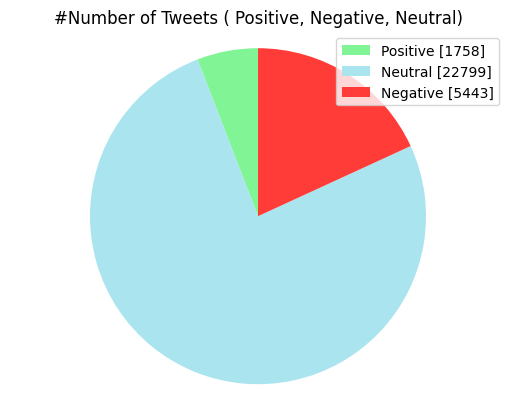

In [9]:
positive=1758
neutral=22799
negative=5443

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral)' )
plt.axis('equal')
plt.show()

# Average Length  &  Word Counts of Tweets

In [10]:
df['text_len'] = df['Tweet'].astype(str).apply(len)
df['text_word_count'] = df['Tweet'].apply(lambda x: len(str(x).split()))
print("Average length of tweets ", round(np.mean(df['text_len'])))
print("Average word counts of tweets", round(np.mean(df['text_word_count'])))

Average length of tweets  133
Average word counts of tweets 19


# Top 50 positive tweets

In [11]:
df.nlargest(n=50, columns=['Compound'])["Tweet"]

12104        I'm not here to play.\nI always follow bac...
12109     I'm not here to play.\nI always follow back 😊...
12118      I'm not here to play.\nI always follow back ...
12140                        I'm not here to play.\nI a...
12141                      I'm not here to play.\nI alw...
12143      I'm not here to play.\nI always follow back ...
12147      I'm not here to play.\nI always follow back ...
12160      I'm not here to play.\nI always follow back ...
12161                      I'm not here to play.\nI alw...
12163                 I'm not here to play.\nI always f...
12166                      I'm not here to play.\nI alw...
12167      I'm not here to play.\nI always follow back ...
12168      I'm not here to play.\nI always follow back ...
12170      I'm not here to play.\nI always follow back ...
12172                           I'm not here to play.\n...
12190    I'm not here to play.\nI always follow back 😊 ...
25267    Eating the rich = Self Care! 😊😊😊🤷🏾‍♀️🤷🏾‍♀️🤷🏾‍♀.

# Top 50 negative tweets

In [12]:
df.nsmallest(n=50, columns=['Compound'])["Tweet"]

24922    War is a tragedy, it is one of the worst human...
1293     \n\nRECKLESS DISREGARD for the safety/lives of...
7815     Woman Found Murdered In Ukraine Military base ...
29363    Even the devil is ignoring Putin right now.\n\...
11333     Attention.🔞🔞🔞 Violent footage.⚠⚠⚠ How the Naz...
3808     THE WESTERN WORLD IS MIND-MURDERED BY ITS OWN ...
12665      Why should  ban 18- 60s from fleeing to safe...
8007      #FidelCastro sent his communist #Cuban crimin...
10867    #Macron trying to “talk” with Rus WAR CRIMINAL...
27885    Childrens executed by #Russians under the age ...
20873    ZELENSKYY: 'HARD BATTLE' LIES AHEAD\n\nEven as...
19533      Stand alone with your Rassia. They can't jus...
43         Are these pics from Dunbas region conflict  ...
10858    War crimes are #WarCrimes, doesn't matter if i...
1901     Russia has massacred innocent families. \n\nPu...
17472    Trotz Schnee, bleibt die Heizung bei mir aus. ...
1451     I was forced by  to acknowledge how i was wron.

# Top 50 tweets with maximum numbers of retweets

In [13]:
df.sort_values('Retweets', ascending=False)['Tweet'].drop_duplicates().head(50)

24065     Il fallait s’y attendre : des clowns démagogu...
19027     President #VolodymyrZelenskyy speaks to the r...
28075     A deer with deep burns rescued by local resid...
16        A deer with deep burns rescued by local resid...
28035     ❗️В Буче российские оккупанты убили все мужск...
12833     If you:\nSupport Ukraine But not Palestine Sy...
2928      Questa storia dei nazisti ucraini mi ha stufa...
23737    A deer with deep burns rescued by local reside...
26771     Russia's attack has left Ukrainians and #indi...
27583     The price of Russian oil and gas.\nThe price ...
11514     #Ukraine army cats are trained to spot and di...
27590     1/ Ukrainian Theater of War, Day 37: Today’s ...
12285     Mardi explosif  12/14h. La sénatrice  sur le ...
26773     SA News Weekly Bulletin:\n\n■ #RussiaUkraineW...
26577     A running angry joke in #Ukraine these days. ...
26342    's account is temporarily unavailable because ...
3793      This is the wife of the Vice President of Ukr.

# Visualization of the Sentiment Scores of Positive, Neutral & Negative Tweets

<Axes: xlabel='Neutral', ylabel='Density'>

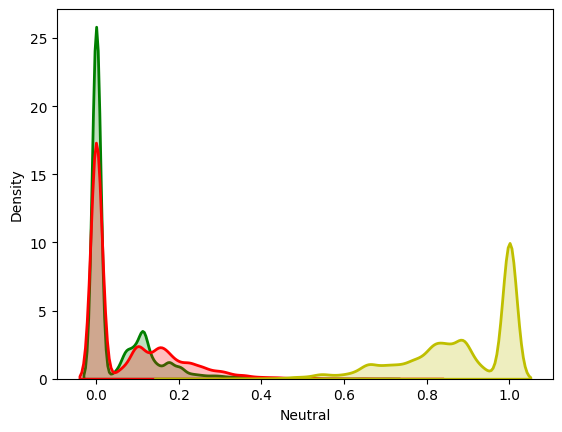

In [14]:
sns.distplot(df["Positive"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Negative"], hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Neutral"], hist=False, kde=True, 
             bins=int(180/5), color = 'y', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# Visualization of the Sentiment Scores

<Axes: xlabel='Compound', ylabel='Density'>

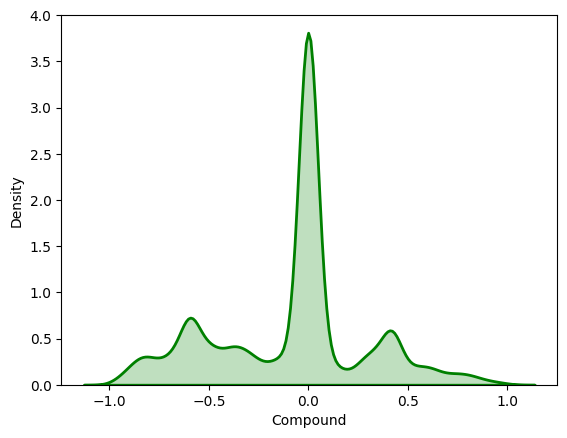

In [15]:
sns.distplot(df["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# Wordcloud for All Sentiments

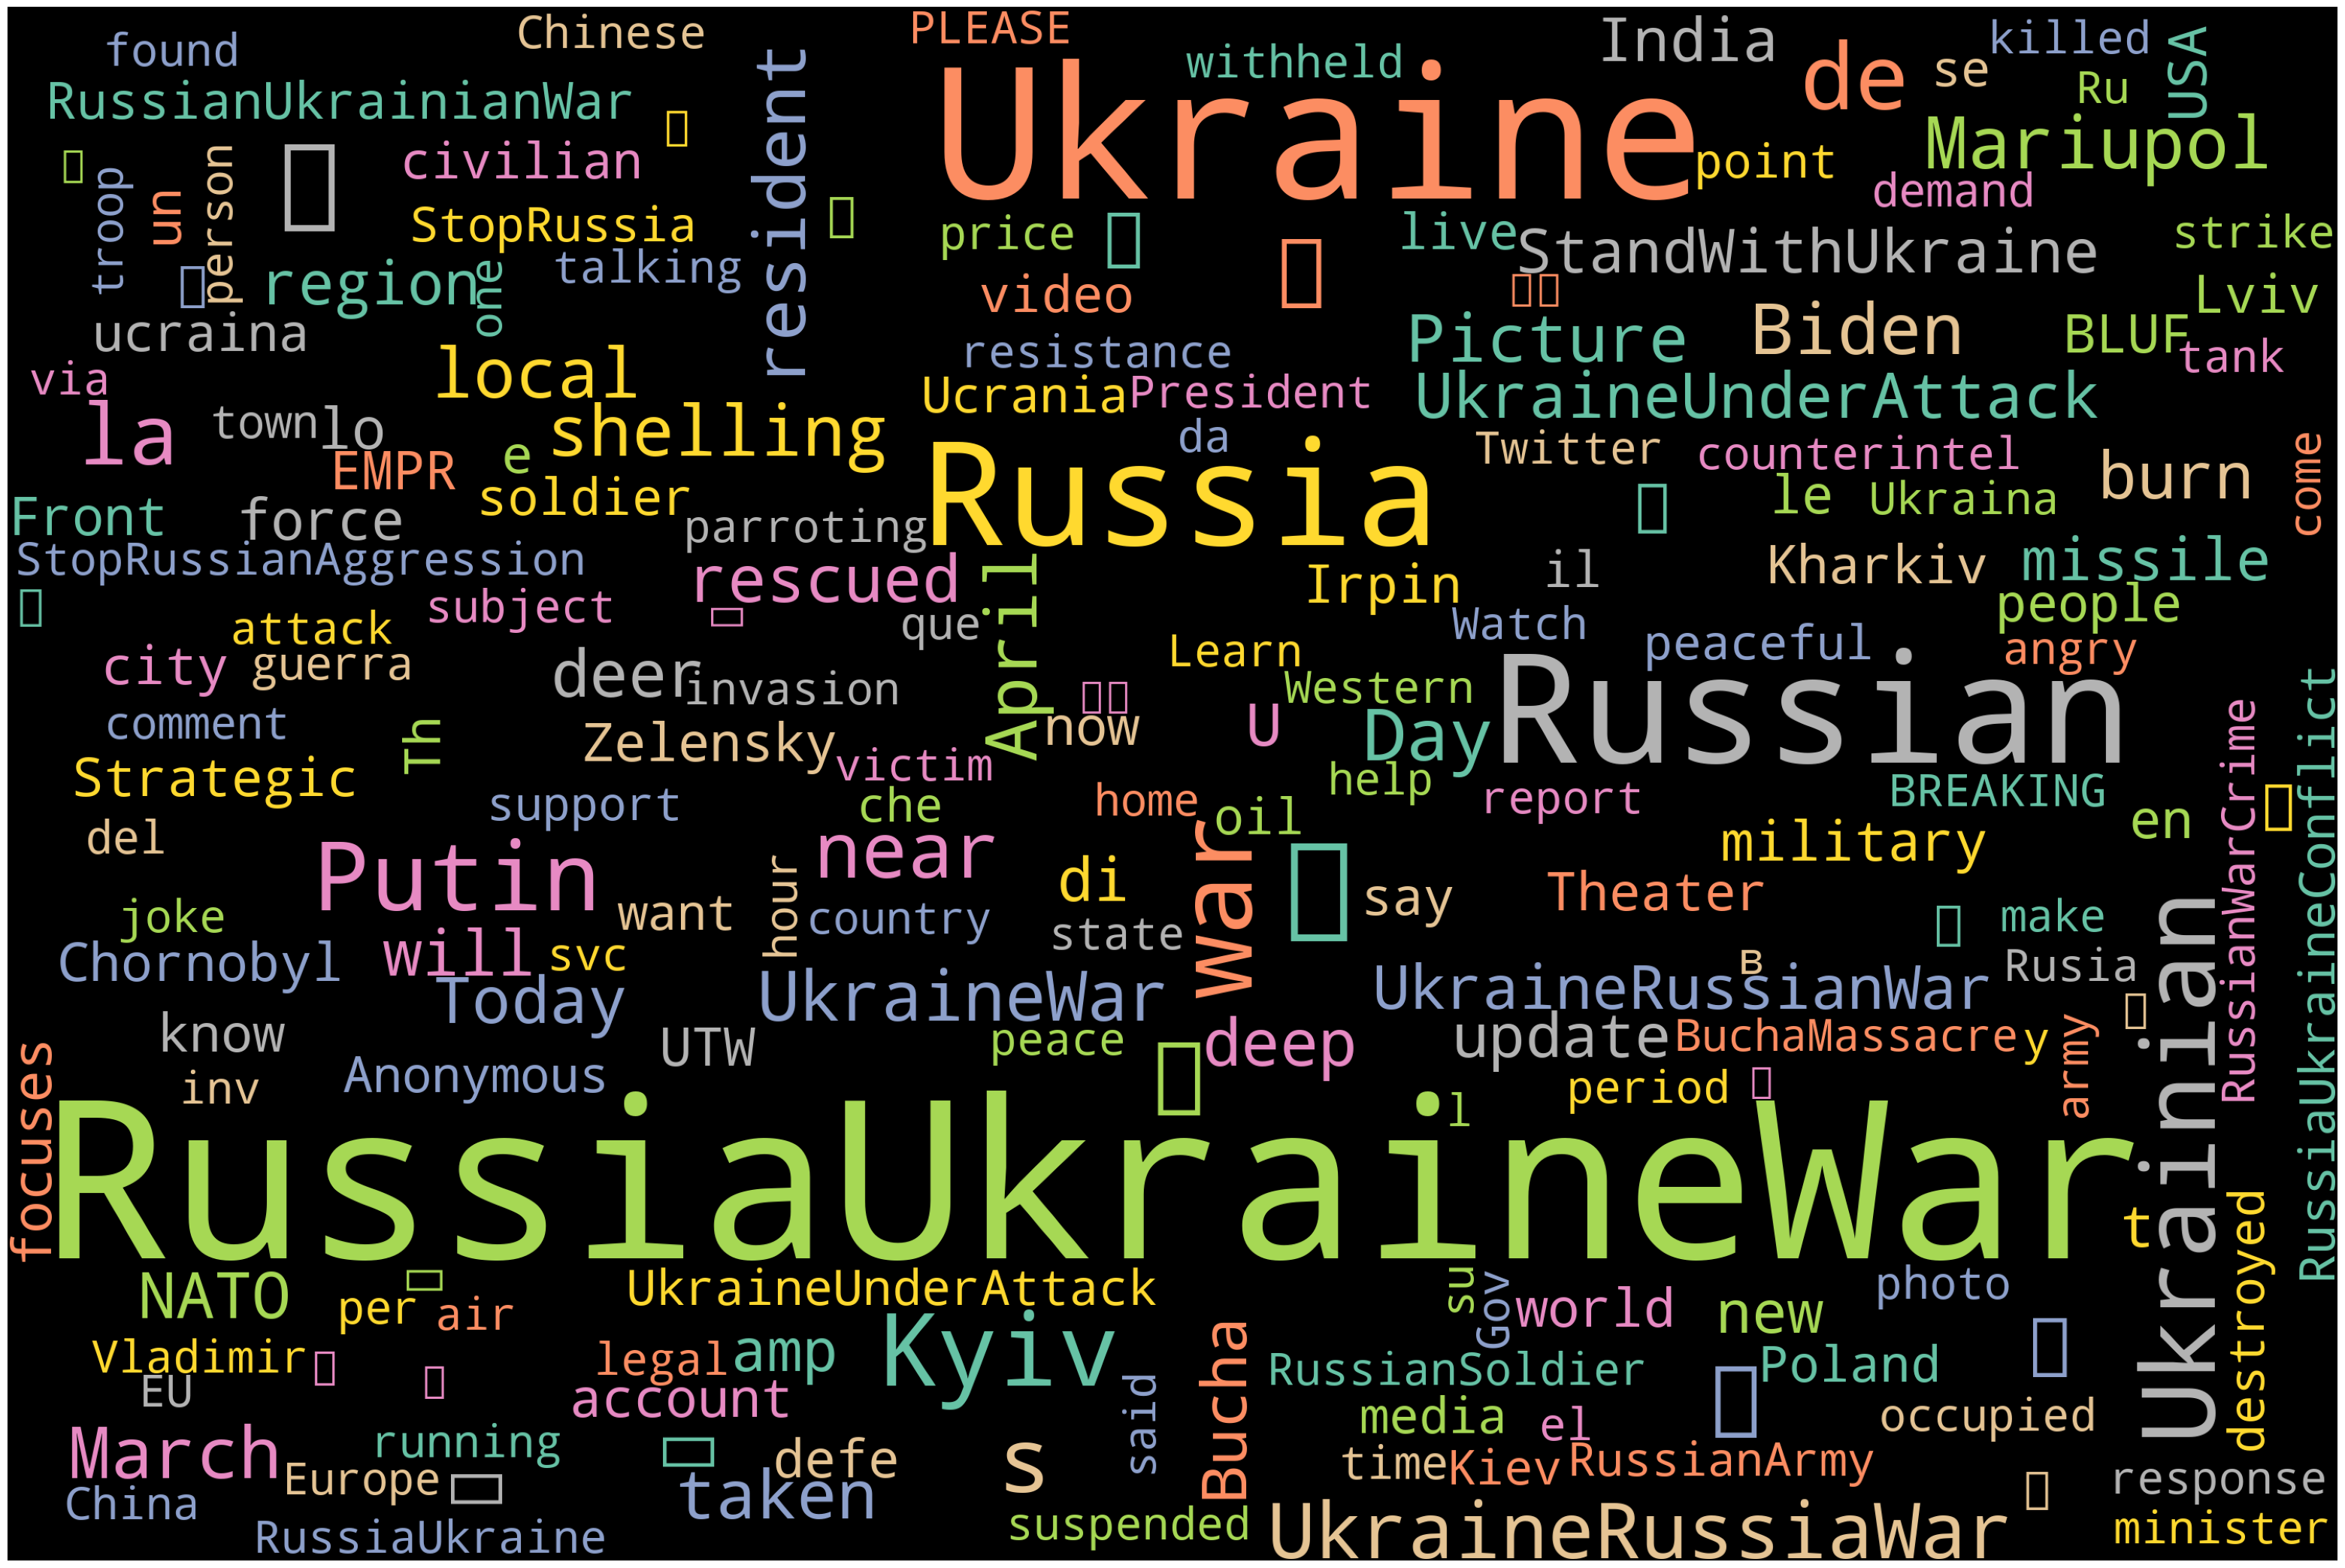

In [16]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *

#function to display wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");



### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df.Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

# Wordcloud for Negative Sentiments

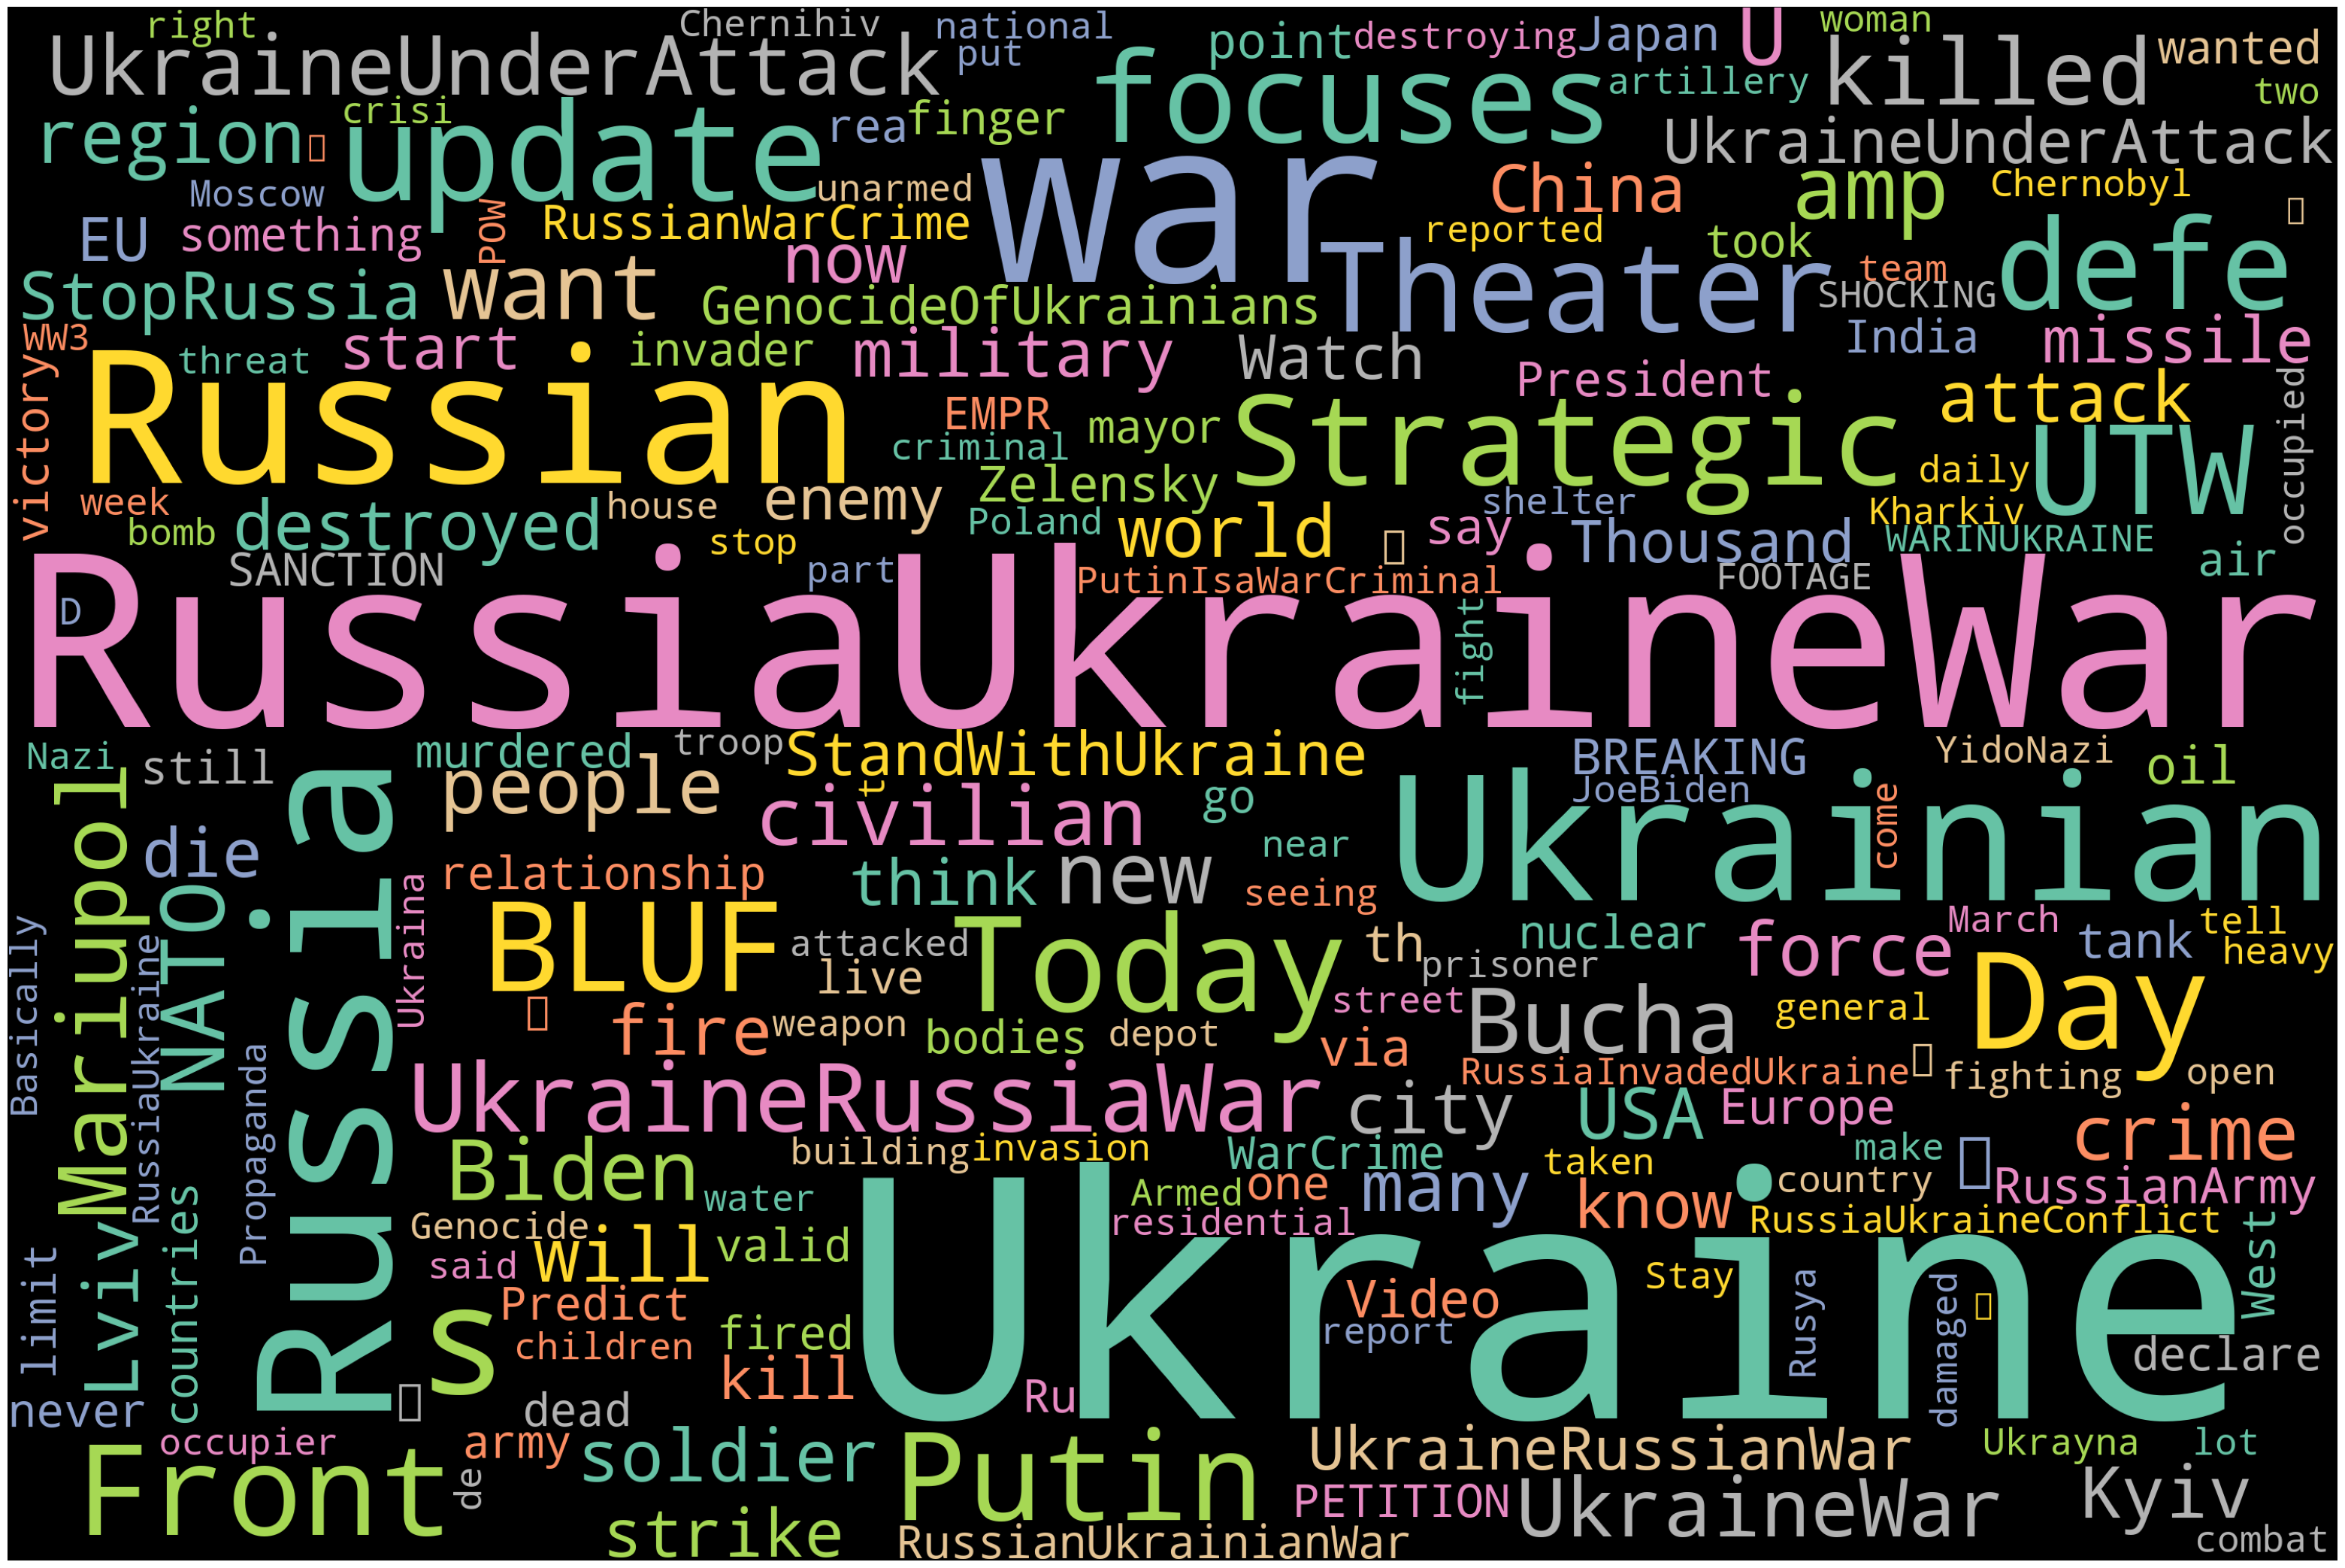

In [17]:
#wordcloud for Negative tweets 
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Negative'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

# Wordcloud for Positive Sentiments

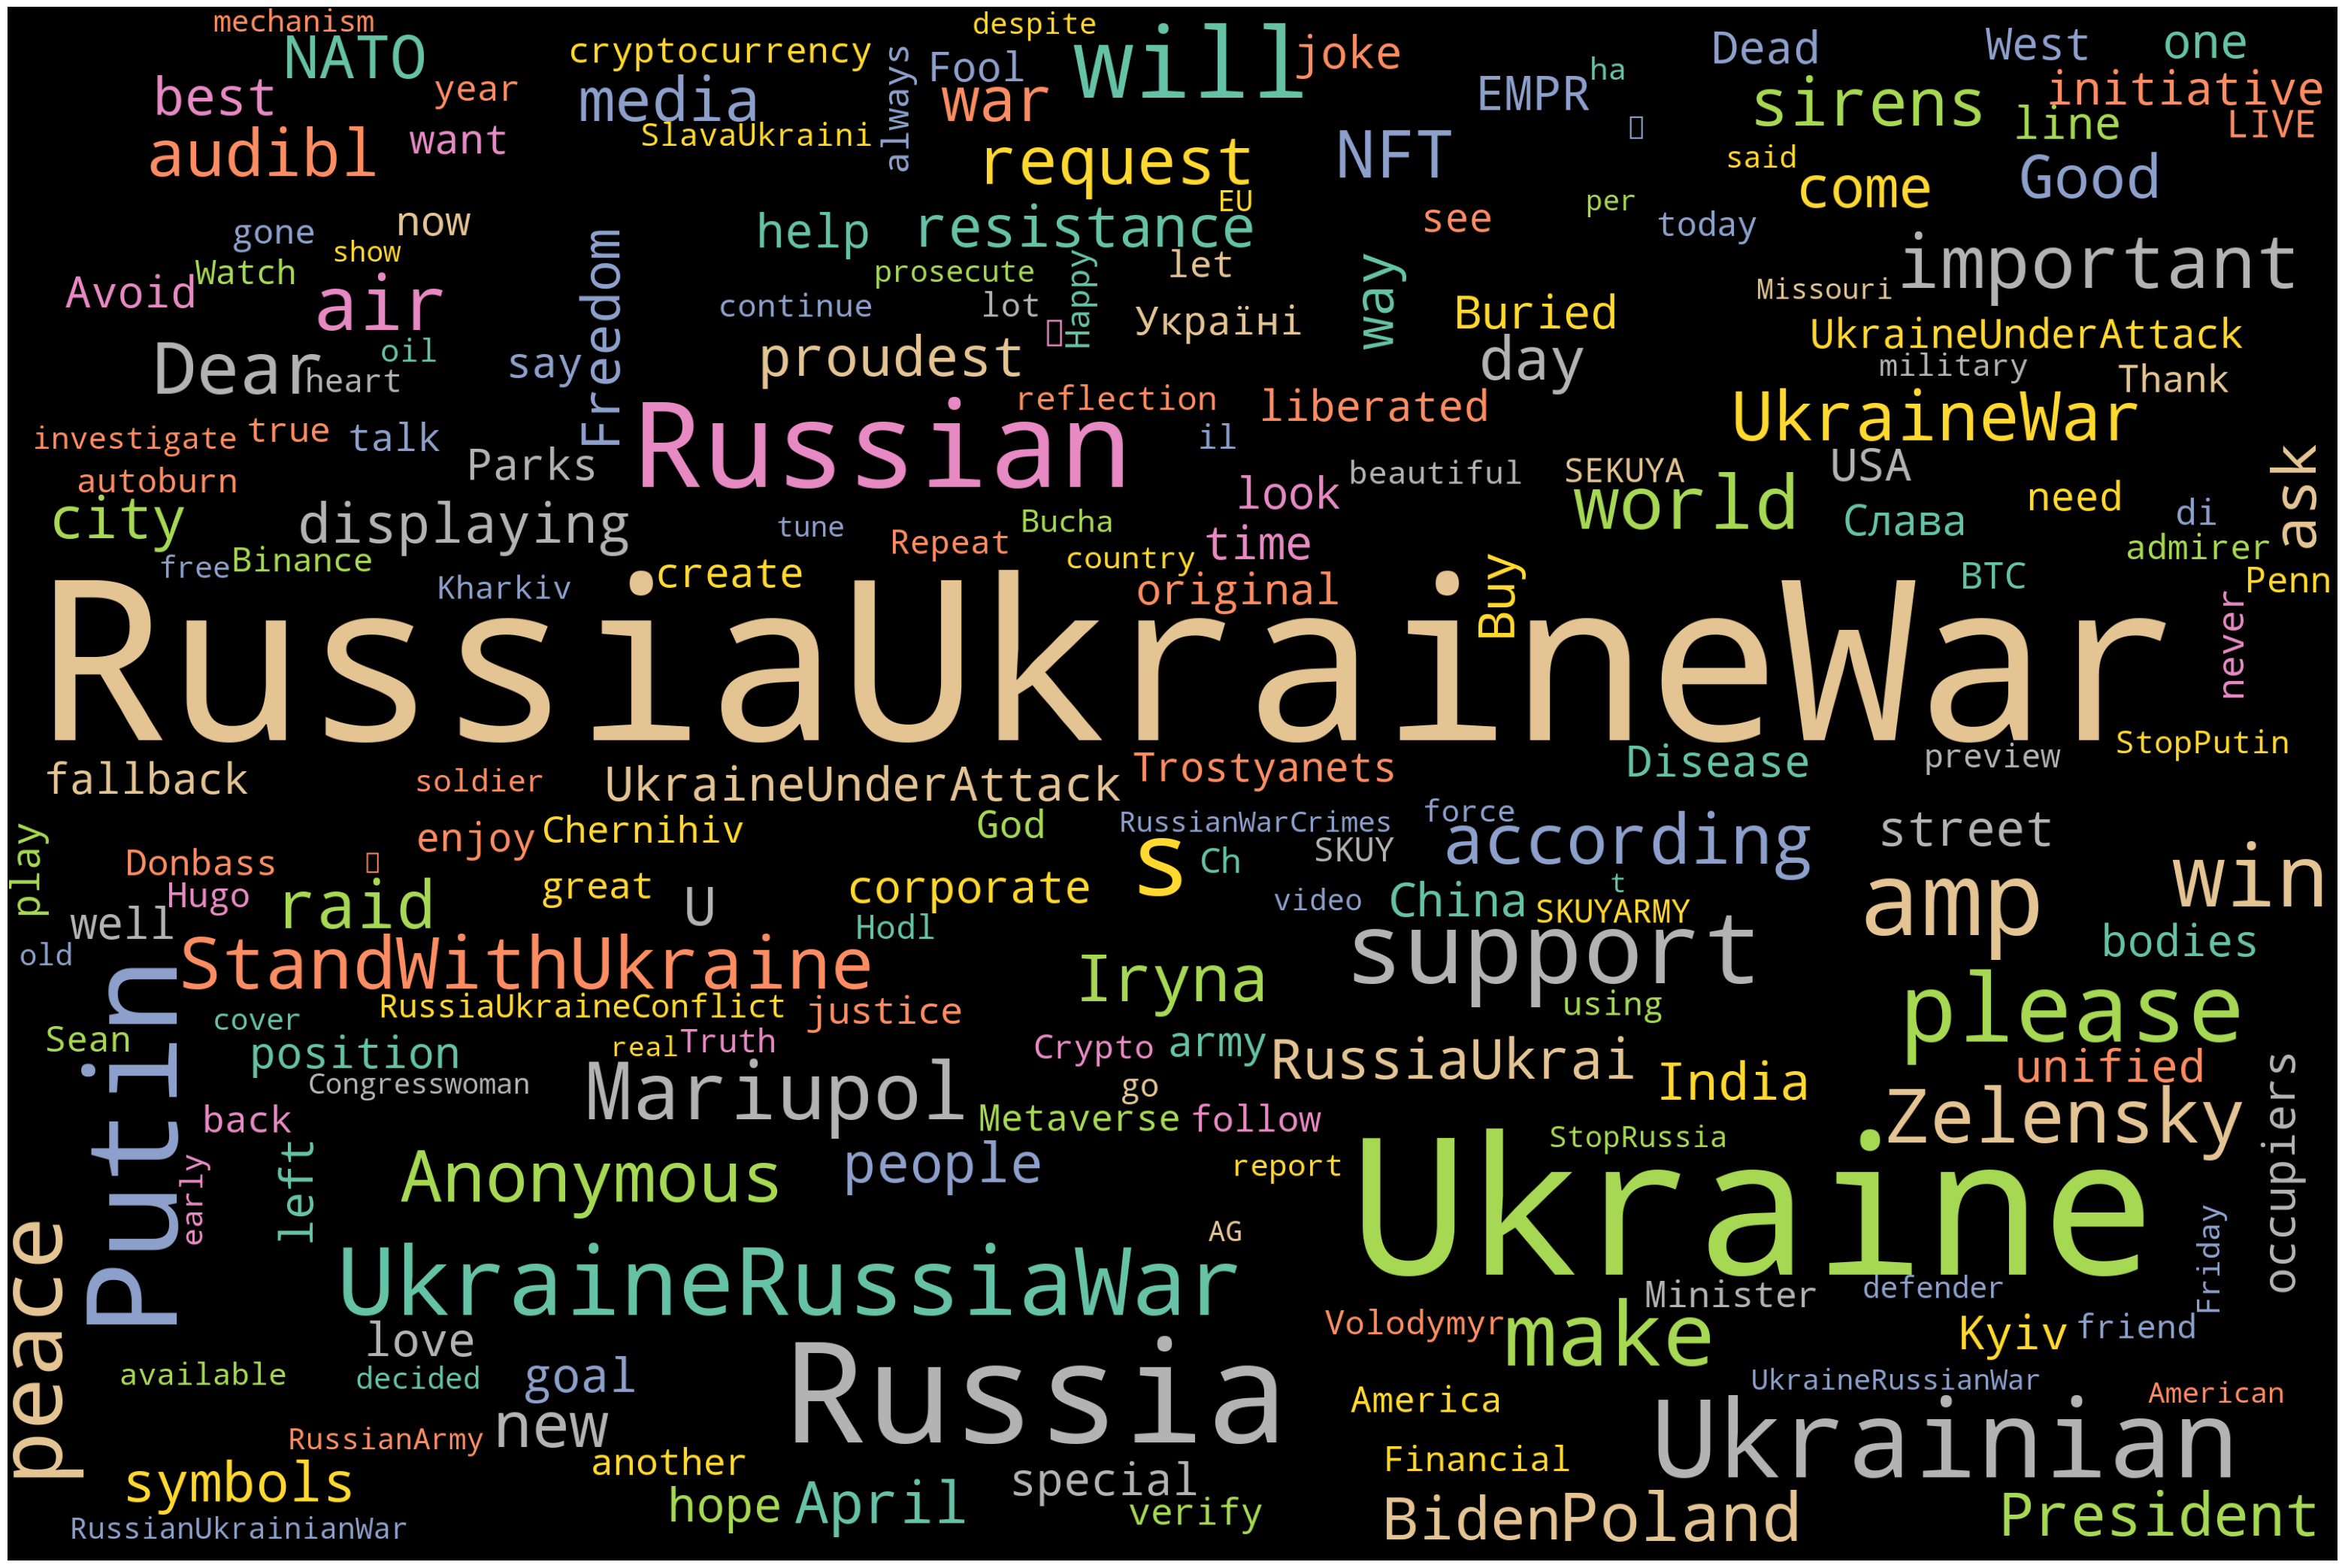

In [18]:
#wordcloud for Positive tweets 
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Positive'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

# Wordcloud for Neutral Sentiments

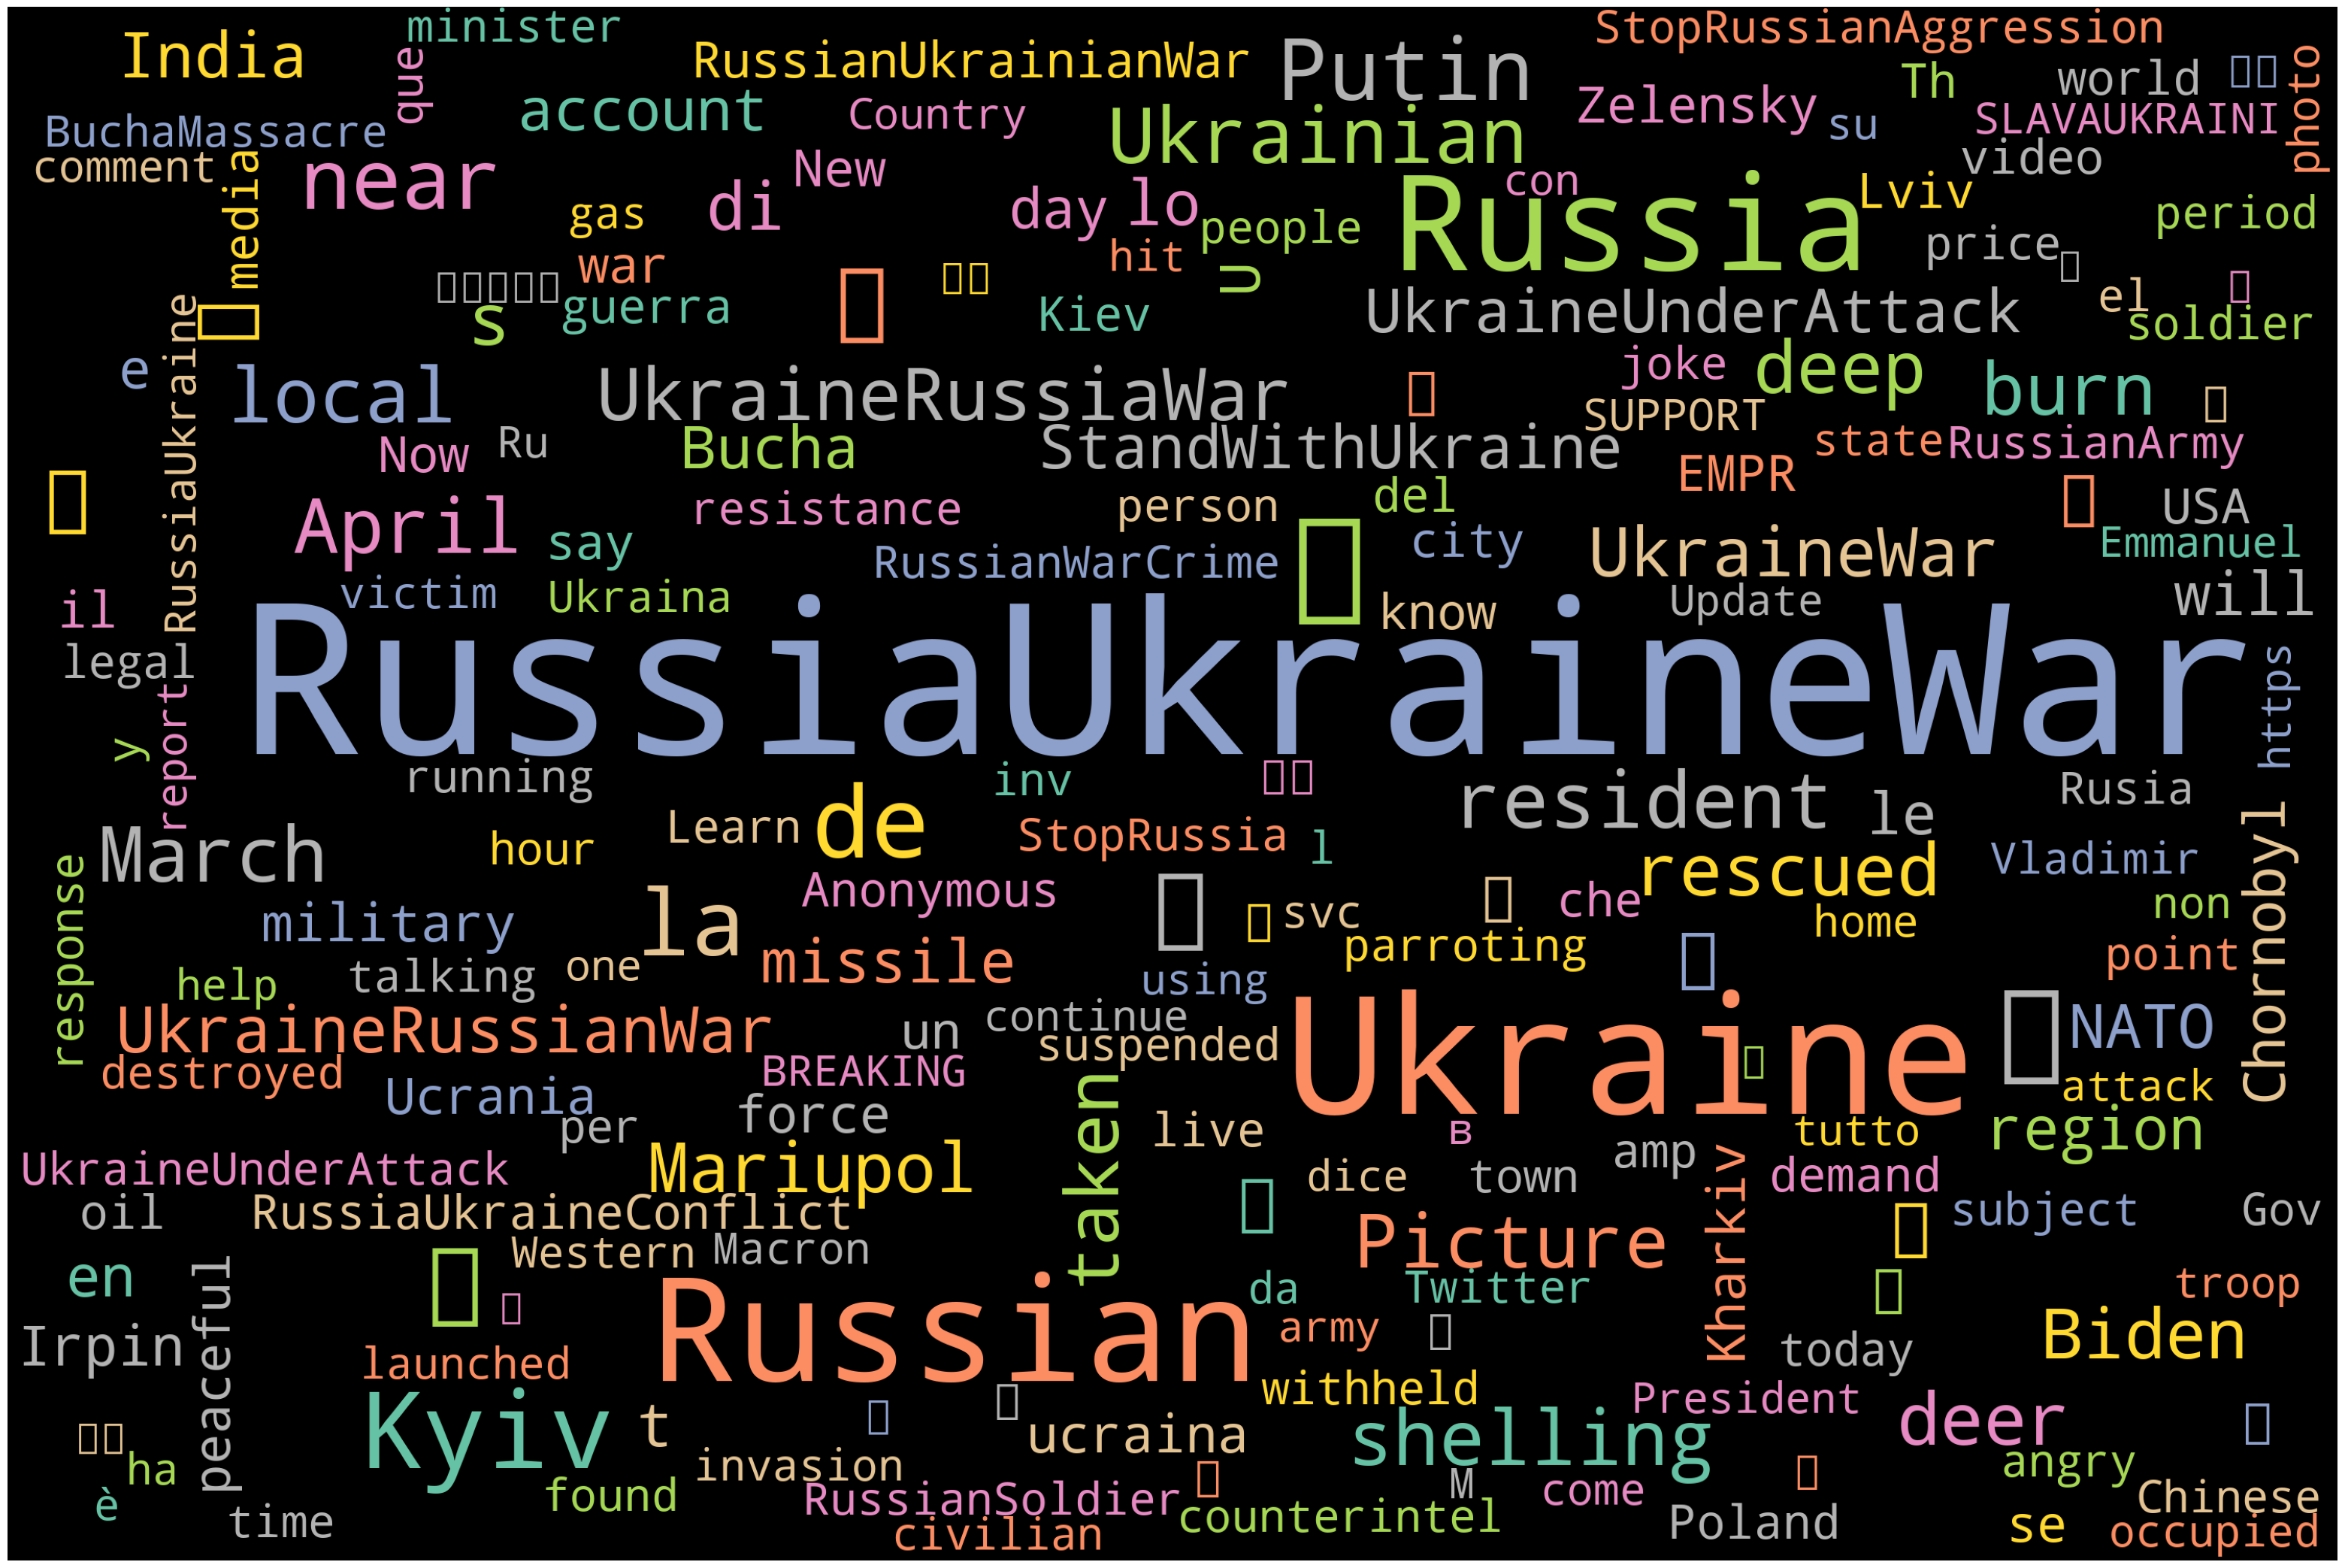

In [19]:
#wordcloud for Neutral tweets 
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Neutral'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

# Collect the positive hashtags from the tweets data

In [20]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['Tweet'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive[0:10]

['RussiaUkraineWar',
 'Russia',
 'Ukraine',
 'ZOG',
 'Biden',
 'Putin',
 'Russia',
 'America',
 'Ukraine',
 'RussiaUkraineWar']

# Collect the negative hashtags from the tweets data.

In [21]:
HT_negative = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_negative  = hashtag_extract(df['Tweet'][df['Compound'] < -0.5])
# unnesting list
HT_negative = sum(HT_negative,[])
HT_negative[0:10]

['ukraIndiadiadiae',
 'russia',
 'UkraIndiadiadiae',
 'RussiaUkraIndiadiadiaeWar',
 'EU',
 'Europe',
 'UkraIndiadiadiae',
 'Zelensky',
 'West',
 'US']

# Comparison of Sentiment Score of Tweets by Indian and from Other Country

<Axes: xlabel='Compound', ylabel='Density'>

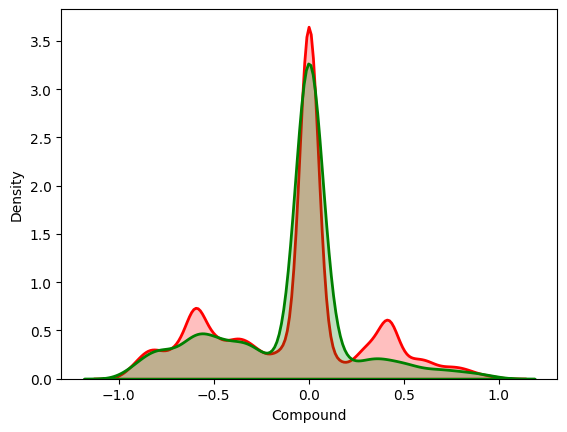

In [22]:
#Removing NAN and NA from the locations columns. 

df[['Location']] = df[['Location']].fillna('')

sns.distplot(df[~df["Location"].str.contains('India')]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'r', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df[df['Location'].str.contains("India")]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'g', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# Comparison of Sentiment Score of Tweets from Ukraine and from other Country

<Axes: xlabel='Compound', ylabel='Density'>

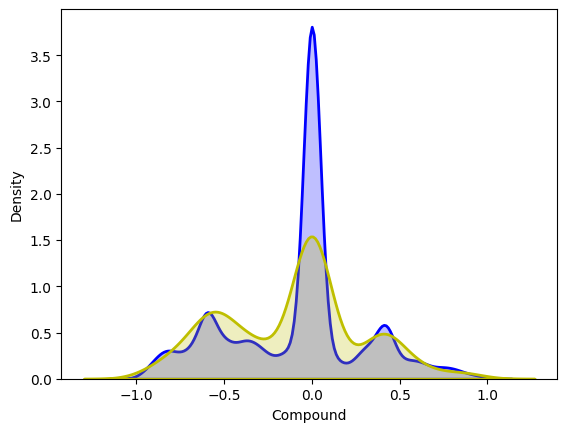

In [23]:
sns.distplot(df[~df["Location"].str.contains('Ukraine')]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df[df['Location'].str.contains("Ukraine")]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'y', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})